29/11/2020

DUBOIS Thomas

manipulation pandas, numpy et matplotlib

# Introduction

Pour ce Notebook nous allons utiliser une jeu de données portant sur les matchs de Foot des 5 grands championats d'Europe des années 1995 à 2019.

Nous allons manipuler ces données, dans un premier temps afin de créer 'automatiquement' le classement pour un championnat et une année donnée.

Dans un deuxième temps nous allons voir l'évolutiuon du nombre de buts par championnat.

# Manipulation du DF

In [40]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd

In [41]:
df = pd.read_csv("data/BIG FIVE 1995-2019.csv", sep=",")


In [42]:
df

,Round,Date,Team 1,FT,HT,Team 2,Year,Country,FT Team 1,FT Team 2,HT Team 1,HT Team 2,GGD,Team 1 (pts),Team 2 (pts)
0,1,(Sat) 19 Aug 1995 (W33),Aston Villa FC,3-1,3-0,Manchester United FC,1995,ENG,3,1,3,0,2,3,0
1,1,(Sat) 19 Aug 1995 (W33),Blackburn Rovers FC,1-0,1-0,Queens Park Rangers FC,1995,ENG,1,0,1,0,1,3,0
2,1,(Sat) 19 Aug 1995 (W33),Chelsea FC,0-0,0-0,Everton FC,1995,ENG,0,0,0,0,0,1,1
3,1,(Sat) 19 Aug 1995 (W33),Liverpool FC,1-0,0-0,Sheffield Wednesday FC,1995,ENG,1,0,0,0,1,3,0
4,1,(Sat) 19 Aug 1995 (W33),Manchester City FC,1-1,0-1,Tottenham Hotspur FC,1995,ENG,1,1,0,1,0,1,1
5,1,(Sat) 19 Aug 1995 (W33),Newcastle United FC,3-0,1-0,Coventry City FC,1995,ENG,3,0,1,0,3,3,0
6,1,(Sat) 19 Aug 1995 (W33),Southampton FC,3-4,1-3,Nottingham Forest FC,1995,ENG,3,4,1,3,1,0,3
7,1,(Sat) 19 Aug 1995 (W33),West Ham United FC,1-2,1-0,Leeds United FC,1995,ENG,1,2,1,0,1,0,3
8,1,(Sat) 19 Aug 1995 (W33),Wimbledon FC,3-2,2-2,Bolton Wanderers FC,1995,ENG,3,2,2,2,1,3,0
9,1,(Sun) 20 Aug 1995 (W33),Arsenal FC,1-1,1-1,Middlesbrough FC,1995,ENG,1,1,1,1,0,1,1


On va essayer ici de commencer par jouer avec les données. On voudrait commencer par donner le classement de chaque championnat, pour chaque saison.

Commencons par creer des dataframe par pays :

In [43]:
df.describe()

,Round,Year,FT Team 1,FT Team 2,HT Team 1,HT Team 2,GGD,Team 1 (pts),Team 2 (pts)
count,44269.000000,44269.000000,44269.000000,44269.000000,44269.000000,44269.000000,44269.000000,44269.000000,44269.000000
mean,18.852154,2007.006641,1.539271,1.112065,0.680137,0.477987,1.319388,1.669498,1.065960
std,10.694362,7.130475,1.282207,1.109638,0.824792,0.695605,1.187047,1.300856,1.237966
min,1.000000,1995.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,2001.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,19.000000,2007.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
75%,28.000000,2013.000000,2.000000,2.000000,1.000000,1.000000,2.000000,3.000000,3.000000
max,42.000000,2019.000000,10.000000,9.000000,7.000000,6.000000,9.000000,3.000000,3.000000


Nous apprend qu'il n'y a pas de valeurs manquantes, on comprends un peu mieux le jeu de données, on peut aussi voir le max et min des années et du nombre de journées de chamionnat. Rien d'incohérent.

In [45]:
df['Country'].unique()

array(['ENG', 'ESP', 'FR', 'GER', 'IT'], dtype=object)

On voit les 5 grands championnats ainsi que leur apelation.
On va scinder notre df celon les championnats. On aurait pu creer un index dessus, mais on choisi de procéder ainsi pour indexer plus simplement celon l'année.

In [46]:
df_eng  = df.loc[df['Country']=='ENG']
df_esp  = df.loc[df['Country']=='ESP']
df_fr   = df.loc[df['Country']=='FR']
df_ger  = df.loc[df['Country']=='GER']
df_it   = df.loc[df['Country']=='IT']

On va donc les indexer celon l'année ce qui nous gagnera beaucoup de temps !

In [47]:
df_eng = df_eng.set_index("Year")
df_esp = df_esp.set_index("Year")
df_fr  = df_fr.set_index("Year")
df_ger = df_ger.set_index("Year")
df_it  = df_it.set_index("Year")

Ainsi, si l'on veut avoir accès aux données de la saison 2019 en France on utilise :

In [48]:
df_fr.loc[2019]

,Round,Date,Team 1,FT,HT,Team 2,Country,FT Team 1,FT Team 2,HT Team 1,HT Team 2,GGD,Team 1 (pts),Team 2 (pts)
Year,,,,,,,,,,,,,,
2019,1,(Fri) 9 Aug 2019 (W32),AS Monaco,0-3,0-2,Olympique Lyonnais,FR,0,3,0,2,3,0,3
2019,1,(Sat) 10 Aug 2019 (W32),Olympique de Marseille,0-2,0-0,Stade de Reims,FR,0,2,0,0,2,0,3
2019,1,(Sat) 10 Aug 2019 (W32),Angers SCO,3-1,3-1,Girondins de Bordeaux,FR,3,1,3,1,2,3,0
2019,1,(Sat) 10 Aug 2019 (W32),Stade Brestois 29,1-1,1-0,Toulouse FC,FR,1,1,1,0,0,1,1
2019,1,(Sat) 10 Aug 2019 (W32),Dijon FCO,1-2,1-2,AS Saint-Étienne,FR,1,2,1,2,1,0,3
2019,1,(Sat) 10 Aug 2019 (W32),Montpellier HSC,0-1,0-1,Stade Rennais FC,FR,0,1,0,1,1,0,3
2019,1,(Sat) 10 Aug 2019 (W32),OGC Nice,2-1,1-0,Amiens SC,FR,2,1,1,0,1,3,0
2019,1,(Sun) 11 Aug 2019 (W32),Lille OSC,2-1,1-0,FC Nantes,FR,2,1,1,0,1,3,0
2019,1,(Sun) 11 Aug 2019 (W32),RC Strasbourg,1-1,1-0,FC Metz,FR,1,1,1,0,0,1,1


Etant donné la manière dont est construite la base de données, on va commencer par procéder au classement à domicile puis au classsement à l'exterieur !

Pour cela on a besoin de sélectionner juste les colonnes "Team 1" et "Team 1 (pts)";

On souhaite selectionner par "Team 1", on utilise group_by. On n'oublie pas d'utiliser la fonction sum pour additionner les points gagnés par équipe;


# Classement par points

In [49]:
df_eng.loc[1995][["Team 1", "Team 1 (pts)"]].groupby(["Team 1"]).sum()

,Team 1 (pts)
Team 1,
Arsenal FC,37
Aston Villa FC,38
Blackburn Rovers FC,44
Bolton Wanderers FC,19
Chelsea FC,28
Coventry City FC,25
Everton FC,35
Leeds United FC,27
Liverpool FC,46


Tel quel les données sont triées par ordre alphabétiques des noms d'équipe. On utilise sort_values par points pour trier en fonction du classement, afin d'avoir un classement on utilise ascending = False pour commncer par les équipes ayant le plus de points.

In [51]:
classement = df_eng.loc[1995][["Team 1", "Team 1 (pts)"]].groupby(["Team 1"]).sum().sort_values('Team 1 (pts)',ascending=False)
classement

,Team 1 (pts)
Team 1,
Newcastle United FC,52
Manchester United FC,49
Liverpool FC,46
Blackburn Rovers FC,44
Nottingham Forest FC,39
Aston Villa FC,38
Arsenal FC,37
Everton FC,35
Tottenham Hotspur FC,32


En faisant de même avec les matchs à l'exterieur (Team 2) on obtient :

In [53]:
class_ext = df_eng.loc[1995][["Team 2", "Team 2 (pts)"]].groupby(["Team 2"]).sum().sort_values('Team 2 (pts)',ascending=False)
class_ext

,Team 2 (pts)
Team 2,
Manchester United FC,33
Tottenham Hotspur FC,29
Everton FC,26
Newcastle United FC,26
Arsenal FC,26
Liverpool FC,25
Aston Villa FC,25
Chelsea FC,22
Wimbledon FC,20


Si on veut le classement final il faut additionner ces deux resultats de points pour chaque équipe. On commence par mettre les classements exterieur et domiciles dans le meme dataframe :

In [54]:
classement['Team 2 (pts)'] = class_ext["Team 2 (pts)"]
classement

,Team 1 (pts),Team 2 (pts)
Team 1,,
Newcastle United FC,52,26
Manchester United FC,49,33
Liverpool FC,46,25
Blackburn Rovers FC,44,17
Nottingham Forest FC,39,19
Aston Villa FC,38,25
Arsenal FC,37,26
Everton FC,35,26
Tottenham Hotspur FC,32,29


Puis on créé notre colonne classement :

In [55]:
classement['final']=classement['Team 1 (pts)']+classement['Team 2 (pts)']

On n'oublie pas de trier en fonction du classement final : 

In [56]:
classement.sort_values('final',ascending=False)

,Team 1 (pts),Team 2 (pts),final
Team 1,,,
Manchester United FC,49,33,82
Newcastle United FC,52,26,78
Liverpool FC,46,25,71
Aston Villa FC,38,25,63
Arsenal FC,37,26,63
Blackburn Rovers FC,44,17,61
Everton FC,35,26,61
Tottenham Hotspur FC,32,29,61
Nottingham Forest FC,39,19,58


C'est parfait ! Mais... comment définir qui est meilleur entre Aston Villa et Arsenal ? le classement est ici donné par ordre alphabétique de l'équipe si nombre de points équivalents... Ce qui n'est évidemment pas le cas dans la réalité.

On va pour cela utiliser la colonne GGD, toutefois celle-ci n'est pas sufisante :

En cas de victoire le goal avérage est positif

En cas de défaite le goal avérage est négatif

Il faudra donc mettre cela en place.

On va commencer par changer cette case GGD et l'effectuer pour Team 1 et Team 2

On revient sur notre df, on créé un index (pas nécéssaire mais + simple et + lisible)

# Ajout de GGD au classement

On va en profiter pour rappeler que l'accès à une case d'un df par indexation est très lent et donc à éviter de préférence, en voici la preuve (et une méthode de gagner du temps de calcul :

In [57]:
import time

In [58]:
tps1 = time.clock()
GGD_1 = []
GGD_2 = []
for i in range(len(df)):
    if (df.loc[i][13] ==3): #indice 13 = Team 1 (pts)
        GGD_1.append(df.loc[i][12]) #indice 12 = GGD
        GGD_2.append(-df.loc[i][12])
    elif(df.loc[i][14] ==3): 
        GGD_1.append(-df.loc[i][12])
        GGD_2.append(df.loc[i][12])
    else:
        GGD_1.append(df.loc[i][12])
        GGD_2.append(df.loc[i][12])
tps2 = time.clock()
print(tps2-tps1)

39.3833615


In [59]:
tps1 = time.clock()
GGD_1 = []
GGD_2 = []
for i in range(len(df)):
    temp = df.loc[i]
    if (temp[13] ==3): #indice 13 = Team 1 (pts)
        GGD_1.append(temp[12]) #indice 12 = GGD
        GGD_2.append(-temp[12])
    elif(temp[14] ==3): 
        GGD_1.append(-temp[12])
        GGD_2.append(temp[12])
    else:
        GGD_1.append(temp[12])
        GGD_2.append(temp[12])
tps2 = time.clock()
print(tps2-tps1)

13.683017400000004


On a désormais nos deux GGD (domicile et exterieur), on va les ajouter au df final

In [60]:
df['GGD Team 1']=GGD_1
df['GGD Team 2']=GGD_2
df

,Round,Date,Team 1,FT,HT,Team 2,Year,Country,FT Team 1,FT Team 2,HT Team 1,HT Team 2,GGD,Team 1 (pts),Team 2 (pts),GGD Team 1,GGD Team 2
0,1,(Sat) 19 Aug 1995 (W33),Aston Villa FC,3-1,3-0,Manchester United FC,1995,ENG,3,1,3,0,2,3,0,2,-2
1,1,(Sat) 19 Aug 1995 (W33),Blackburn Rovers FC,1-0,1-0,Queens Park Rangers FC,1995,ENG,1,0,1,0,1,3,0,1,-1
2,1,(Sat) 19 Aug 1995 (W33),Chelsea FC,0-0,0-0,Everton FC,1995,ENG,0,0,0,0,0,1,1,0,0
3,1,(Sat) 19 Aug 1995 (W33),Liverpool FC,1-0,0-0,Sheffield Wednesday FC,1995,ENG,1,0,0,0,1,3,0,1,-1
4,1,(Sat) 19 Aug 1995 (W33),Manchester City FC,1-1,0-1,Tottenham Hotspur FC,1995,ENG,1,1,0,1,0,1,1,0,0
5,1,(Sat) 19 Aug 1995 (W33),Newcastle United FC,3-0,1-0,Coventry City FC,1995,ENG,3,0,1,0,3,3,0,3,-3
6,1,(Sat) 19 Aug 1995 (W33),Southampton FC,3-4,1-3,Nottingham Forest FC,1995,ENG,3,4,1,3,1,0,3,-1,1
7,1,(Sat) 19 Aug 1995 (W33),West Ham United FC,1-2,1-0,Leeds United FC,1995,ENG,1,2,1,0,1,0,3,-1,1
8,1,(Sat) 19 Aug 1995 (W33),Wimbledon FC,3-2,2-2,Bolton Wanderers FC,1995,ENG,3,2,2,2,1,3,0,1,-1
9,1,(Sun) 20 Aug 1995 (W33),Arsenal FC,1-1,1-1,Middlesbrough FC,1995,ENG,1,1,1,1,0,1,1,0,0


On remet en place les df selon les différents pays :

In [61]:
df_eng  = df.loc[df['Country']=='ENG']
df_esp  = df.loc[df['Country']=='ESP']
df_fr   = df.loc[df['Country']=='FR']
df_ger  = df.loc[df['Country']=='GER']
df_it   = df.loc[df['Country']=='IT']

Ainsi que l'indéxation selon les années :

In [62]:
df_eng = df_eng.set_index("Year")
df_esp = df_esp.set_index("Year")
df_fr  = df_fr.set_index("Year")
df_ger = df_ger.set_index("Year")
df_it  = df_it.set_index("Year")

In [63]:
df_eng

,Round,Date,Team 1,FT,HT,Team 2,Country,FT Team 1,FT Team 2,HT Team 1,HT Team 2,GGD,Team 1 (pts),Team 2 (pts),GGD Team 1,GGD Team 2
Year,,,,,,,,,,,,,,,,
1995,1,(Sat) 19 Aug 1995 (W33),Aston Villa FC,3-1,3-0,Manchester United FC,ENG,3,1,3,0,2,3,0,2,-2
1995,1,(Sat) 19 Aug 1995 (W33),Blackburn Rovers FC,1-0,1-0,Queens Park Rangers FC,ENG,1,0,1,0,1,3,0,1,-1
1995,1,(Sat) 19 Aug 1995 (W33),Chelsea FC,0-0,0-0,Everton FC,ENG,0,0,0,0,0,1,1,0,0
1995,1,(Sat) 19 Aug 1995 (W33),Liverpool FC,1-0,0-0,Sheffield Wednesday FC,ENG,1,0,0,0,1,3,0,1,-1
1995,1,(Sat) 19 Aug 1995 (W33),Manchester City FC,1-1,0-1,Tottenham Hotspur FC,ENG,1,1,0,1,0,1,1,0,0
1995,1,(Sat) 19 Aug 1995 (W33),Newcastle United FC,3-0,1-0,Coventry City FC,ENG,3,0,1,0,3,3,0,3,-3
1995,1,(Sat) 19 Aug 1995 (W33),Southampton FC,3-4,1-3,Nottingham Forest FC,ENG,3,4,1,3,1,0,3,-1,1
1995,1,(Sat) 19 Aug 1995 (W33),West Ham United FC,1-2,1-0,Leeds United FC,ENG,1,2,1,0,1,0,3,-1,1
1995,1,(Sat) 19 Aug 1995 (W33),Wimbledon FC,3-2,2-2,Bolton Wanderers FC,ENG,3,2,2,2,1,3,0,1,-1


On récupere maintenant les lignes créant le classement ci dessus en ajoutant simplement nos deux nouveaux GGD au classement et une colonne GGD final représentant notre goal avérage final :

In [65]:
classement = df_eng.loc[1995][["Team 1", "Team 1 (pts)","GGD Team 1"]].groupby(["Team 1"]).sum().sort_values('Team 1 (pts)',ascending=False)
class_ext = df_eng.loc[1995][["Team 2", "Team 2 (pts)",'GGD Team 2']].groupby(["Team 2"]).sum().sort_values('Team 2 (pts)',ascending=False)
classement['Team 2 (pts)'] = class_ext["Team 2 (pts)"]
classement['GGD Team 2'] = class_ext['GGD Team 2']
classement['final']=classement['Team 1 (pts)']+classement['Team 2 (pts)']
classement['GGD final']=classement['GGD Team 1']+classement['GGD Team 1']
classement_final = classement[['final','GGD final']].sort_values(['final','GGD final'],ascending=False)
classement_final

,final,GGD final
Team 1,,
Manchester United FC,82,54
Newcastle United FC,78,58
Liverpool FC,71,66
Aston Villa FC,63,34
Arsenal FC,63,28
Blackburn Rovers FC,61,50
Everton FC,61,32
Tottenham Hotspur FC,61,14
Nottingham Forest FC,58,24


On a ici le vrai classement ! Sauf... si on regarde bien, qui est meilleur entre Leeds United et Middlesbrough ?? il faut alors regarder l'équipe qui a marquer le plus de buts, car c'est la meilleure attaque qui l'emporte sur la meilleure défense ! 
On recommence donc depuis le début comme pour GGD

# Ajout de nombre de buts marqués au classement

In [66]:
df

,Round,Date,Team 1,FT,HT,Team 2,Year,Country,FT Team 1,FT Team 2,HT Team 1,HT Team 2,GGD,Team 1 (pts),Team 2 (pts),GGD Team 1,GGD Team 2
0,1,(Sat) 19 Aug 1995 (W33),Aston Villa FC,3-1,3-0,Manchester United FC,1995,ENG,3,1,3,0,2,3,0,2,-2
1,1,(Sat) 19 Aug 1995 (W33),Blackburn Rovers FC,1-0,1-0,Queens Park Rangers FC,1995,ENG,1,0,1,0,1,3,0,1,-1
2,1,(Sat) 19 Aug 1995 (W33),Chelsea FC,0-0,0-0,Everton FC,1995,ENG,0,0,0,0,0,1,1,0,0
3,1,(Sat) 19 Aug 1995 (W33),Liverpool FC,1-0,0-0,Sheffield Wednesday FC,1995,ENG,1,0,0,0,1,3,0,1,-1
4,1,(Sat) 19 Aug 1995 (W33),Manchester City FC,1-1,0-1,Tottenham Hotspur FC,1995,ENG,1,1,0,1,0,1,1,0,0
5,1,(Sat) 19 Aug 1995 (W33),Newcastle United FC,3-0,1-0,Coventry City FC,1995,ENG,3,0,1,0,3,3,0,3,-3
6,1,(Sat) 19 Aug 1995 (W33),Southampton FC,3-4,1-3,Nottingham Forest FC,1995,ENG,3,4,1,3,1,0,3,-1,1
7,1,(Sat) 19 Aug 1995 (W33),West Ham United FC,1-2,1-0,Leeds United FC,1995,ENG,1,2,1,0,1,0,3,-1,1
8,1,(Sat) 19 Aug 1995 (W33),Wimbledon FC,3-2,2-2,Bolton Wanderers FC,1995,ENG,3,2,2,2,1,3,0,1,-1
9,1,(Sun) 20 Aug 1995 (W33),Arsenal FC,1-1,1-1,Middlesbrough FC,1995,ENG,1,1,1,1,0,1,1,0,0


C'est "très simple" il s'agit d'additioner tous les chiffres de la colonne FT Team 1 qui représente le nombre de buts marqués par l'équipe 1 à la fin du match (HT à la mi temps seulement). De même pour Team 2.

In [67]:
classement = df_eng.loc[1995][["Team 1", "Team 1 (pts)","GGD Team 1",'FT Team 1']].groupby(["Team 1"]).sum().sort_values('Team 1 (pts)',ascending=False)
class_ext = df_eng.loc[1995][["Team 2", "Team 2 (pts)",'GGD Team 2','FT Team 2']].groupby(["Team 2"]).sum().sort_values('Team 2 (pts)',ascending=False)
classement['Team 2 (pts)'] = class_ext["Team 2 (pts)"]
classement['FT Team 2']    = class_ext['FT Team 2']
classement['GGD Team 2']   = class_ext['GGD Team 2']

classement['final']        = classement['Team 1 (pts)']+ classement['Team 2 (pts)']
classement['GGD final']    = classement['GGD Team 1']  + classement['GGD Team 1']
classement['Goal final']   = classement['FT Team 1']   + classement['FT Team 1']

classement_final = classement[['final','GGD final','Goal final']].sort_values(['final','GGD final','Goal final'],ascending=False)
classement_final

,final,GGD final,Goal final
Team 1,,,
Manchester United FC,82,54,72
Newcastle United FC,78,58,76
Liverpool FC,71,66,92
Aston Villa FC,63,34,64
Arsenal FC,63,28,60
Blackburn Rovers FC,61,50,88
Everton FC,61,32,70
Tottenham Hotspur FC,61,14,52
Nottingham Forest FC,58,24,58


Cette fois c'est parfait! Si on regarde Aston Villa et Arsenal ont le même nombre de point mais Arsenal ayant une différence de but de 34 contre 28 pour Arsenal est donc classé meilleur !

De même Middlesbrough et Leeds ayant le même nombre de points et la même différence de but, Middlesbrough est mieux classé car ils ont marqués 54 buts contre 42 pour Leeds !

# Creation d'une fonction donnant le classement

Nous allons pour finir cette partie créer une fonction permettant de donner le classement d'un championnant automatiquement avec comme entrée l'année et le pays :

In [68]:
df

,Round,Date,Team 1,FT,HT,Team 2,Year,Country,FT Team 1,FT Team 2,HT Team 1,HT Team 2,GGD,Team 1 (pts),Team 2 (pts),GGD Team 1,GGD Team 2
0,1,(Sat) 19 Aug 1995 (W33),Aston Villa FC,3-1,3-0,Manchester United FC,1995,ENG,3,1,3,0,2,3,0,2,-2
1,1,(Sat) 19 Aug 1995 (W33),Blackburn Rovers FC,1-0,1-0,Queens Park Rangers FC,1995,ENG,1,0,1,0,1,3,0,1,-1
2,1,(Sat) 19 Aug 1995 (W33),Chelsea FC,0-0,0-0,Everton FC,1995,ENG,0,0,0,0,0,1,1,0,0
3,1,(Sat) 19 Aug 1995 (W33),Liverpool FC,1-0,0-0,Sheffield Wednesday FC,1995,ENG,1,0,0,0,1,3,0,1,-1
4,1,(Sat) 19 Aug 1995 (W33),Manchester City FC,1-1,0-1,Tottenham Hotspur FC,1995,ENG,1,1,0,1,0,1,1,0,0
5,1,(Sat) 19 Aug 1995 (W33),Newcastle United FC,3-0,1-0,Coventry City FC,1995,ENG,3,0,1,0,3,3,0,3,-3
6,1,(Sat) 19 Aug 1995 (W33),Southampton FC,3-4,1-3,Nottingham Forest FC,1995,ENG,3,4,1,3,1,0,3,-1,1
7,1,(Sat) 19 Aug 1995 (W33),West Ham United FC,1-2,1-0,Leeds United FC,1995,ENG,1,2,1,0,1,0,3,-1,1
8,1,(Sat) 19 Aug 1995 (W33),Wimbledon FC,3-2,2-2,Bolton Wanderers FC,1995,ENG,3,2,2,2,1,3,0,1,-1
9,1,(Sun) 20 Aug 1995 (W33),Arsenal FC,1-1,1-1,Middlesbrough FC,1995,ENG,1,1,1,1,0,1,1,0,0


On rappelle le code utilisé ci dessus que l'on va réinterpréter sous forme de fonction :

In [ ]:
classement = df_eng.loc[1995][["Team 1", "Team 1 (pts)","GGD Team 1"]].groupby(["Team 1"]).sum().sort_values('Team 1 (pts)',ascending=False)
class_ext = df_eng.loc[1995][["Team 2", "Team 2 (pts)",'GGD Team 2']].groupby(["Team 2"]).sum().sort_values('Team 2 (pts)',ascending=False)
classement['Team 2 (pts)'] = class_ext["Team 2 (pts)"]
classement['GGD Team 2'] = class_ext['GGD Team 2']
classement['final']=classement['Team 1 (pts)']+classement['Team 2 (pts)']
classement['GGD final']=classement['GGD Team 1']+classement['GGD Team 1']
classement_final = classement[['final','GGD final']].sort_values(['final','GGD final'],ascending=False)
classement_final

In [70]:
pays = 'FR'
# choix possibles : #ENG, ESP, FR, GER, IT
annee = 2019
#choix possibles entre 1995 et 2019 inclus


def donne_classement(pays,annee):
    
    df_use  = df.loc[df['Country']==pays]
    df_use  = df_use.set_index("Year")
    df_use  = df_use.loc[annee]
    df_use = df_use.reset_index()
    
    
    GGD_1 = []
    GGD_2 = []
    for i in range(len(df_use)):
        temp = df_use.loc[i]
        if (temp[13] ==3): #indice 13 = Team 1 (pts)
            GGD_1.append(temp[12]) #indice 12 = GGD
            GGD_2.append(-temp[12])
        elif(temp[14] ==3): 
            GGD_1.append(-temp[12])
            GGD_2.append(temp[12])
        else:
            GGD_1.append(temp[12])
            GGD_2.append(temp[12])
    df_use['GGD Team 1']=GGD_1
    df_use['GGD Team 2']=GGD_2

    
    
    classement = df_use[["Team 1", "Team 1 (pts)","GGD Team 1",'FT Team 1']].groupby(["Team 1"]).sum()
    class_ext = df_use[["Team 2", "Team 2 (pts)",'GGD Team 2','FT Team 2']].groupby(["Team 2"]).sum()
    classement['Team 2 (pts)'] = class_ext["Team 2 (pts)"]
    classement['FT Team 2']    = class_ext['FT Team 2']
    classement['GGD Team 2']   = class_ext['GGD Team 2']

    classement['final']        = classement['Team 1 (pts)']+ classement['Team 2 (pts)']
    classement['GGD final']    = classement['GGD Team 1']  + classement['GGD Team 1']
    classement['Goal final']   = classement['FT Team 1']   + classement['FT Team 1']

    classement_final = classement[['final','GGD final','Goal final']].sort_values(['final','GGD final','Goal final'],ascending=False)
    position = range(1,len(classement_final)+1)
    classement_final['Position'] = position
    classement_final = classement_final.reset_index()
    classement_final = classement_final.set_index(['Position'])
    return classement_final
donne_classement(pays,annee)

,Team 1,final,GGD final,Goal final
Position,,,,
1,Paris Saint-Germain,68,66,88
2,Olympique de Marseille,56,14,42
3,Stade Rennais FC,50,22,50
4,Lille OSC,49,30,48
5,OGC Nice,41,16,56
6,Stade de Reims,41,10,24
7,Montpellier HSC,40,32,52
8,Olympique Lyonnais,40,20,34
9,AS Monaco,40,14,58


# Analyse

Nous allons maintenant pratiquer plusieurs analyses. Il est ici très difficile voir impossible d'effectuer des prédictions, nous pouvons toutefois comparer les championnats ainsi que les évolutions selon différents critères.

In [88]:
df

,Round,Date,Team 1,FT,HT,Team 2,Year,Country,FT Team 1,FT Team 2,HT Team 1,HT Team 2,GGD,Team 1 (pts),Team 2 (pts),GGD Team 1,GGD Team 2
0,1,(Sat) 19 Aug 1995 (W33),Aston Villa FC,3-1,3-0,Manchester United FC,1995,ENG,3,1,3,0,2,3,0,2,-2
1,1,(Sat) 19 Aug 1995 (W33),Blackburn Rovers FC,1-0,1-0,Queens Park Rangers FC,1995,ENG,1,0,1,0,1,3,0,1,-1
2,1,(Sat) 19 Aug 1995 (W33),Chelsea FC,0-0,0-0,Everton FC,1995,ENG,0,0,0,0,0,1,1,0,0
3,1,(Sat) 19 Aug 1995 (W33),Liverpool FC,1-0,0-0,Sheffield Wednesday FC,1995,ENG,1,0,0,0,1,3,0,1,-1
4,1,(Sat) 19 Aug 1995 (W33),Manchester City FC,1-1,0-1,Tottenham Hotspur FC,1995,ENG,1,1,0,1,0,1,1,0,0
5,1,(Sat) 19 Aug 1995 (W33),Newcastle United FC,3-0,1-0,Coventry City FC,1995,ENG,3,0,1,0,3,3,0,3,-3
6,1,(Sat) 19 Aug 1995 (W33),Southampton FC,3-4,1-3,Nottingham Forest FC,1995,ENG,3,4,1,3,1,0,3,-1,1
7,1,(Sat) 19 Aug 1995 (W33),West Ham United FC,1-2,1-0,Leeds United FC,1995,ENG,1,2,1,0,1,0,3,-1,1
8,1,(Sat) 19 Aug 1995 (W33),Wimbledon FC,3-2,2-2,Bolton Wanderers FC,1995,ENG,3,2,2,2,1,3,0,1,-1
9,1,(Sun) 20 Aug 1995 (W33),Arsenal FC,1-1,1-1,Middlesbrough FC,1995,ENG,1,1,1,1,0,1,1,0,0


## comparaison de l'évolution du nombre de buts par championnats

Creation d'une focntion comptant le nombre de buts marqués par équipe à domicile et à l'exterieur en fonction de l'année :

In [85]:
pays  = 'ESP'
annee = 1995
def nb_but_equipe(pays, annee):
    df_use  = df.loc[df['Country']==pays]
    df_use  = df_use.set_index("Year")
    df_use  = df_use.loc[annee]
    df_use  = df_use.reset_index()

   
    domicile  = df_use[["Team 1" ,'FT Team 1']].groupby(["Team 1"]).sum()
    domicile.columns = [annee]
    exterieur = df_use[["Team 2" ,'FT Team 2']].groupby(["Team 2"]).sum()
    exterieur.columns = [annee]
    
    return [domicile,exterieur]
nb_but_equipe(pays,annee)[0] #si 0 buts à domiciles si 1 buts a l'exterieur

,1995
Team 1,
Albacete Balompié,31
Athletic Club Bilbao,25
Atlético Madrid,40
CD Tenerife,38
CP Mérida,22
FC Barcelona,42
RC Celta Vigo,30
RCD Espanyol,34
RCD La Coruña,37


On va créer 2 DF par championnat contenant toutes les équipes et le nombre de buts par année marqués.

On en profite pour compter le nombre d'équipe différentes par championnats car on le rappel chaque année des équipes montent et descendent ce qui rajoute et supprime des équipes.

In [90]:
# choix possibles : #ENG, ESP, FR, GER, IT

buts_domicile_eng  = pd.DataFrame()
buts_exterieur_eng = pd.DataFrame()
buts_domicile_esp  = pd.DataFrame()
buts_exterieur_esp = pd.DataFrame()
buts_domicile_fr   = pd.DataFrame()
buts_exterieur_fr  = pd.DataFrame()
buts_domicile_ger  = pd.DataFrame()
buts_exterieur_ger = pd.DataFrame()
buts_domicile_it  = pd.DataFrame()
buts_exterieur_it = pd.DataFrame()

annee = range(1995,2020)

#on commence par recuperer tous les clubs sur toutes les années car pour rappel
#chaque annee des equipes montent et descendent !
for i in annee:
    tempo_df = nb_but_equipe('ENG',i)[0]
    buts_domicile_eng  = buts_domicile_eng  + tempo_df
    buts_exterieur_eng = buts_exterieur_eng + tempo_df
    tempo_df = nb_but_equipe('ESP',i)[0]
    buts_domicile_esp  = buts_domicile_esp  + tempo_df
    buts_exterieur_esp = buts_exterieur_esp + tempo_df
    tempo_df = nb_but_equipe('FR',i)[0]
    buts_domicile_fr   = buts_domicile_fr   + tempo_df
    buts_exterieur_fr  = buts_exterieur_fr  + tempo_df
    tempo_df = nb_but_equipe('GER',i)[0]
    buts_domicile_ger  = buts_domicile_ger  + tempo_df
    buts_exterieur_ger = buts_exterieur_ger + tempo_df
    tempo_df = nb_but_equipe('IT',i)[0]
    buts_domicile_it   = buts_domicile_it   + tempo_df
    buts_exterieur_it  = buts_exterieur_it  + tempo_df
    
buts_domicile_eng.drop(buts_domicile_eng.iloc[:,:],1,inplace=True)
buts_exterieur_eng.drop(buts_exterieur_eng.iloc[:,:],1,inplace=True)
buts_domicile_esp.drop(buts_domicile_esp.iloc[:,:],1,inplace=True)
buts_exterieur_esp.drop(buts_exterieur_esp.iloc[:,:],1,inplace=True)
buts_domicile_fr.drop(buts_domicile_fr.iloc[:,:],1,inplace=True)
buts_exterieur_fr.drop(buts_exterieur_fr.iloc[:,:],1,inplace=True)
buts_domicile_ger.drop(buts_domicile_ger.iloc[:,:],1,inplace=True)
buts_exterieur_ger.drop(buts_exterieur_ger.iloc[:,:],1,inplace=True)
buts_domicile_it.drop(buts_domicile_it.iloc[:,:],1,inplace=True)
buts_exterieur_it.drop(buts_exterieur_it.iloc[:,:],1,inplace=True)

for i in annee:
    buts_domicile_eng[i]  = nb_but_equipe('ENG',i)[0]
    buts_exterieur_eng[i] = nb_but_equipe('ENG',i)[1]
    buts_domicile_esp[i]  = nb_but_equipe('ESP',i)[0]
    buts_exterieur_esp[i] = nb_but_equipe('ESP',i)[1]
    buts_domicile_fr[i]   = nb_but_equipe('FR',i)[0]
    buts_exterieur_fr[i]  = nb_but_equipe('FR',i)[1]
    buts_domicile_ger[i]  = nb_but_equipe('GER',i)[0]
    buts_exterieur_ger[i] = nb_but_equipe('GER',i)[1]
    buts_domicile_it[i]   = nb_but_equipe('IT',i)[0]
    buts_exterieur_it[i]  = nb_but_equipe('IT',i)[1]
    

print('nombre de clubs différents en Angleterre : ',len(buts_domicile_eng))
print('nombre de clubs différents en Espagne : '   ,len(buts_domicile_esp))
print('nombre de clubs différents en Allemagne : ' ,len(buts_domicile_ger))
print('nombre de clubs différents en Italie : '    ,len(buts_domicile_it))
print('nombre de clubs différents en France : '    ,len(buts_domicile_fr))

nombre de clubs différents en Angleterre :  47
nombre de clubs différents en Espagne :  47
nombre de clubs différents en Allemagne :  39
nombre de clubs différents en Italie :  49
nombre de clubs différents en France :  44


On voit que l'Allemagne est le championnat se démarquant avec le plus faible nombre de clubs différents. Les autres étant relativmeent proches. Il n'y a pas grand chose d'interessant dans ces valeurs, c'était simplement une question que l'on se posait par curiositée.

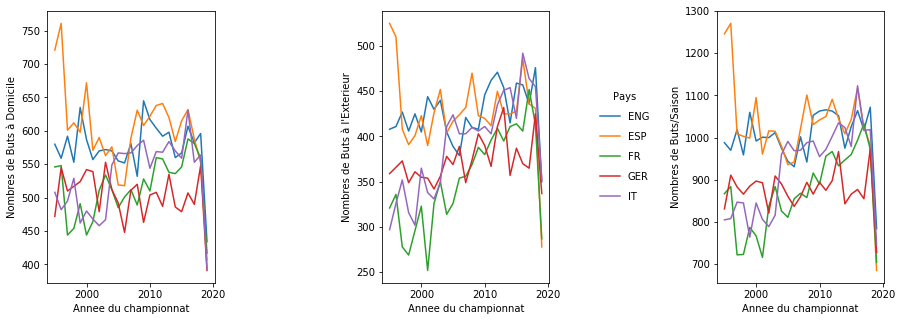

In [91]:
fig = plt.figure(figsize=(15, 5))
fig.subplots_adjust(hspace=1, wspace=1)

x = df['Year'].unique()


# plot 1
ax1 = plt.subplot(1,3,1)

plt.plot(x, buts_domicile_eng.sum(), label = 'ENG')
plt.plot(x, buts_domicile_esp.sum(), label = 'ESP')
plt.plot(x, buts_domicile_fr.sum(),  label = 'FR')
plt.plot(x, buts_domicile_ger.sum(), label = 'GER')
plt.plot(x, buts_domicile_it.sum(),  label = 'IT')

plt.xlabel('Annee du championnat')
plt.ylabel('Nombres de Buts à Domicile')

# plot 2
ax2 = plt.subplot(1,3,2)

plt.plot(x, buts_exterieur_eng.sum(), label = 'ENG')
plt.plot(x, buts_exterieur_esp.sum(), label = 'ESP')
plt.plot(x, buts_exterieur_fr.sum(),  label = 'FR')
plt.plot(x, buts_exterieur_ger.sum(), label = 'GER')
plt.plot(x, buts_exterieur_it.sum(),  label = 'IT')

plt.xlabel('Annee du championnat')
plt.ylabel("Nombres de Buts à l'Exterieur")

# plot 3
ax3 = plt.subplot(1,3,3)

plt.plot(x, buts_exterieur_eng.sum() + buts_domicile_eng.sum(), label = 'ENG')
plt.plot(x, buts_exterieur_esp.sum() + buts_domicile_esp.sum(), label = 'ESP')
plt.plot(x, buts_exterieur_fr.sum()  + buts_domicile_fr.sum(),  label = 'FR')
plt.plot(x, buts_exterieur_ger.sum() + buts_domicile_ger.sum(), label = 'GER')
plt.plot(x, buts_exterieur_it.sum()  + buts_domicile_it.sum(),  label = 'IT')

plt.xlabel('Annee du championnat')
plt.ylabel("Nombres de Buts/Saison")

plt.legend(frameon=False, labelspacing=1,bbox_to_anchor=(-0.35, 0.5) , loc="center right", title='Pays')


plt.show()

On note une première chose : le championnat espagnol marque beaucoup plus de buts par saison, une question se pose alors : y a t il autant d'équipes par championnat ? Cela pourrais en effet avoir un impact énorme :

In [84]:
year = 1995
championnat = df['Country'].unique()
for i in range(len(championnat)):
    print("Nombre d'equipes dans le championnat",championnat[i],'en',year,' : ', len(nb_but_equipe(championnat[i],annee)[0]))

Nombre d'equipes dans le championnat ENG en 1995  :  20
Nombre d'equipes dans le championnat ESP en 1995  :  22
Nombre d'equipes dans le championnat FR en 1995  :  20
Nombre d'equipes dans le championnat GER en 1995  :  18
Nombre d'equipes dans le championnat IT en 1995  :  18


Cela explique donc beaucoup de choses ! Il faut rectifier cela, on va donc évoluer en affichant le nombre de buts moyen marqué par match!

In [92]:
# choix possibles : #ENG, ESP, FR, GER, IT

buts_domicile_eng  = pd.DataFrame()
buts_exterieur_eng = pd.DataFrame()
buts_domicile_esp  = pd.DataFrame()
buts_exterieur_esp = pd.DataFrame()
buts_domicile_fr   = pd.DataFrame()
buts_exterieur_fr  = pd.DataFrame()
buts_domicile_ger  = pd.DataFrame()
buts_exterieur_ger = pd.DataFrame()
buts_domicile_it  = pd.DataFrame()
buts_exterieur_it = pd.DataFrame()

annee = range(1995,2020)

#on commence par recuperer tous les clubs sur toutes les années car pour rappel
#chaque annee des equipes montent et descendent !
for i in annee:
    tempo_df = nb_but_equipe('ENG',i)[0]
    buts_domicile_eng  = buts_domicile_eng  + tempo_df
    buts_exterieur_eng = buts_exterieur_eng + tempo_df
    tempo_df = nb_but_equipe('ESP',i)[0]
    buts_domicile_esp  = buts_domicile_esp  + tempo_df
    buts_exterieur_esp = buts_exterieur_esp + tempo_df
    tempo_df = nb_but_equipe('FR',i)[0]
    buts_domicile_fr   = buts_domicile_fr   + tempo_df
    buts_exterieur_fr  = buts_exterieur_fr  + tempo_df
    tempo_df = nb_but_equipe('GER',i)[0]
    buts_domicile_ger  = buts_domicile_ger  + tempo_df
    buts_exterieur_ger = buts_exterieur_ger + tempo_df
    tempo_df = nb_but_equipe('IT',i)[0]
    buts_domicile_it   = buts_domicile_it   + tempo_df
    buts_exterieur_it  = buts_exterieur_it  + tempo_df
    
buts_domicile_eng.drop(buts_domicile_eng.iloc[:,:],1,inplace=True)
buts_exterieur_eng.drop(buts_exterieur_eng.iloc[:,:],1,inplace=True)
buts_domicile_esp.drop(buts_domicile_esp.iloc[:,:],1,inplace=True)
buts_exterieur_esp.drop(buts_exterieur_esp.iloc[:,:],1,inplace=True)
buts_domicile_fr.drop(buts_domicile_fr.iloc[:,:],1,inplace=True)
buts_exterieur_fr.drop(buts_exterieur_fr.iloc[:,:],1,inplace=True)
buts_domicile_ger.drop(buts_domicile_ger.iloc[:,:],1,inplace=True)
buts_exterieur_ger.drop(buts_exterieur_ger.iloc[:,:],1,inplace=True)
buts_domicile_it.drop(buts_domicile_it.iloc[:,:],1,inplace=True)
buts_exterieur_it.drop(buts_exterieur_it.iloc[:,:],1,inplace=True)

for i in annee:
    tempo = nb_but_equipe('ENG',i)
    buts_domicile_eng[i]  = tempo[0]/(len(tempo[0])-1) #-1 car on ne joue pas contre sois meme
    buts_exterieur_eng[i] = tempo[1]/(len(tempo[0])-1)
    tempo = nb_but_equipe('ESP',i)
    buts_domicile_esp[i]  = tempo[0]/(len(tempo[0])-1)
    buts_exterieur_esp[i] = tempo[1]/(len(tempo[0])-1)
    tempo = nb_but_equipe('FR',i)
    buts_domicile_fr[i]   = tempo[0]/(len(tempo[0])-1)
    buts_exterieur_fr[i]  = tempo[1]/(len(tempo[0])-1)
    tempo = nb_but_equipe('GER',i)
    buts_domicile_ger[i]  = tempo[0]/(len(tempo[0])-1)
    buts_exterieur_ger[i] = tempo[1]/(len(tempo[0])-1)
    tempo = nb_but_equipe('IT',i)
    buts_domicile_it[i]   = tempo[0]/(len(tempo[0])-1)
    buts_exterieur_it[i]  = tempo[1]/(len(tempo[0])-1)

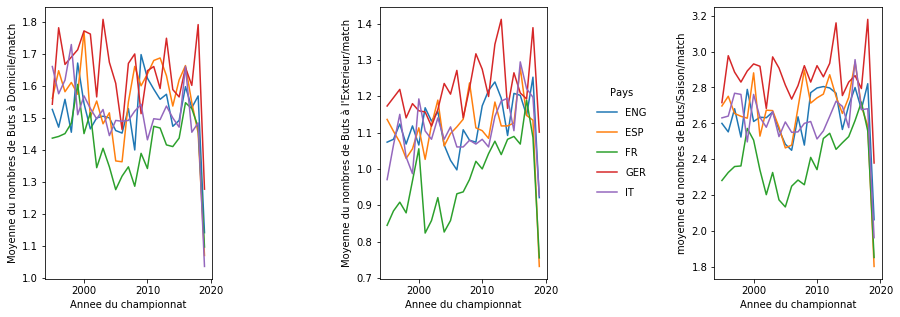

In [94]:
fig = plt.figure(figsize=(15, 5))
fig.subplots_adjust(hspace=1, wspace=1)

x = df['Year'].unique()


# plot 1
ax1 = plt.subplot(1,3,1)

plt.plot(x, buts_domicile_eng.mean(), label = 'ENG')
plt.plot(x, buts_domicile_esp.mean(), label = 'ESP')
plt.plot(x, buts_domicile_fr.mean(),  label = 'FR')
plt.plot(x, buts_domicile_ger.mean(), label = 'GER')
plt.plot(x, buts_domicile_it.mean(),  label = 'IT')

plt.xlabel('Annee du championnat')
plt.ylabel('Moyenne du nombres de Buts à Domicile/match')

# plot 2
ax2 = plt.subplot(1,3,2)

plt.plot(x, buts_exterieur_eng.mean(), label = 'ENG')
plt.plot(x, buts_exterieur_esp.mean(), label = 'ESP')
plt.plot(x, buts_exterieur_fr.mean(),  label = 'FR')
plt.plot(x, buts_exterieur_ger.mean(), label = 'GER')
plt.plot(x, buts_exterieur_it.mean(),  label = 'IT')

plt.xlabel('Annee du championnat')
plt.ylabel("Moyenne du nombres de Buts à l'Exterieur/match")

# plot 3
ax3 = plt.subplot(1,3,3)

plt.plot(x, (buts_exterieur_eng + buts_domicile_eng).mean(), label = 'ENG')
plt.plot(x, (buts_exterieur_esp + buts_domicile_esp).mean(), label = 'ESP')
plt.plot(x, (buts_exterieur_fr  + buts_domicile_fr).mean(),  label = 'FR')
plt.plot(x, (buts_exterieur_ger + buts_domicile_ger).mean(), label = 'GER')
plt.plot(x, (buts_exterieur_it  + buts_domicile_it).mean(),  label = 'IT')

plt.xlabel('Annee du championnat')
plt.ylabel("moyenne du nombres de Buts/Saison/match")

plt.legend(frameon=False, labelspacing=1,bbox_to_anchor=(-0.35, 0.5) , loc="center right", title='Pays')


plt.show()

On remarque cette fois que le championnat d'espagne est 'moins surclassé' et celui de la france 'légerement moins sous classé'.

On remarque toutefois bien facilement que les équipes quels que soient les championnats marquent bien plus à domicile qu'à l'exterieur, ce qui est bien connu dans le domaine du foot.

D'autre part on voit que la France est un championnat qui marque moins, particulièrement à l'exterieur, ce qui est bien que connu des équipes en Ligue 1 qui ont pour habitude 'de bétonner à l'exterieur'.

On voit ensuite que la nombre de buts par championnats est très fluctuant d'une année sur l'autre et que de manière générale les équipes marquent légérement moins à domicile actuellement que par le passé et un peu plus à l'exterieur que par le passé. Le nombre de buts étant quand  à lui plutot stable dans le temps, sauf pour le championnat francais qui semble en augmentation, encourageant ou signe de la domination récente du PSG ?

Enfin la dernière année est beaucoup plus basse que toutes les saisons précédentes du à la crise du covid : championnats pas terminé ou match pas encore écris dans le jeu de données etc.

## comparaison du nombre de points et buts pour haut et bas du classement

Une manière de définir le niveau d'un championnat est parfois donné par la comparaison des meilleurs équipes par championnat. On va ici décider de comparer les meilleurs de chaque championnat, on va déjà voir si ceux ci sont baeucoup changeants ou pas. Pour cela on va effectuer un classement sur toutes ces années :

3 points pour une équipe première
2 points pour une équipe deuxième
1 point pour une équipe troisième

On donne exprès un avantage au 1er car on souhaite donner un avantage aux équipes ayant été championnes :

Pour cela on va utiliser noter fonction qui donne le classement pour une année et un championnat. on va utiliser des boucles pour l'effectuer siur toutes les années et tous les championnats :

Cela est fait hyper facilement, il suffit de donner en année un range comportant toutes les années désirées :

In [129]:
annee = range(1995,2020)

classement_golbal_eng = donne_classement('ENG',annee)
classement_golbal_fr  = donne_classement('FR',annee)
classement_golbal_it  = donne_classement('IT',annee)
classement_golbal_esp = donne_classement('ESP',annee)
classement_golbal_ger = donne_classement('GER',annee)


In [130]:
classement_golbal_fr

,Team 1,final,GGD final,Goal final
Position,,,,
1,Olympique Lyonnais,1676,986,1752
2,Paris Saint-Germain,1648,1122,1860
3,Olympique de Marseille,1441,688,1474
4,Girondins de Bordeaux,1422,632,1422
5,AS Monaco,1381,660,1438
6,Stade Rennais FC,1276,440,1362
7,Lille OSC,1259,544,1258
8,OGC Nice,1003,296,984
9,AS Saint-Étienne,972,370,1024


Attention cette méthode ne donne pas exactement ce que l'on voulait, ici on cummule tous les points gagnés sur toutes les journées, ainsi cela donne l'avantage aux équipes étant dans le championnat depuis plus longtemps et deux places de premiers n'apportent pas autant de point, on est donc obligés d'utiliser une méthode différente :

In [203]:
annee = range(1995,2020)

def pts(position): #fonction modifiable, définie nombre de points en fonction de la position
    if position == 1:
        res = 5
    elif position == 2:
        res = 2
    elif position == 3:
        res = 1
    else:
        res = 0
    return res
#creer les data frame ainsi que leurs structures

top3_eng  = pd.DataFrame(columns = ['Equipe', 'Points'])
top3_eng  = top3_eng.set_index("Equipe")
top3_fr   = pd.DataFrame(columns = ['Equipe', 'Points'])
top3_fr   = top3_fr.set_index("Equipe")
top3_esp  = pd.DataFrame(columns = ['Equipe', 'Points'])
top3_esp  = top3_esp.set_index("Equipe")
top3_it   = pd.DataFrame(columns = ['Equipe', 'Points'])
top3_it   = top3_it.set_index("Equipe")
top3_ger  = pd.DataFrame(columns = ['Equipe', 'Points'])
top3_ger  = top3_ger.set_index("Equipe")
top3_eng

,Points
Equipe,


In [234]:
annee = range(1995,2020)

def pts(position): #fonction modifiable, définie nombre de points en fonction de la position
    if position == 1:
        res = 5
    elif position == 2:
        res = 2
    elif position == 3:
        res = 1
    else:
        res = 0
    return res
#creer les data frame ainsi que leurs structures

name = ['Equipe', 'Points']

top3_eng  = pd.DataFrame(columns = name)
top3_eng  = top3_eng.set_index("Equipe")
top3_fr   = pd.DataFrame(columns = name)
top3_fr   = top3_fr.set_index("Equipe")
top3_esp  = pd.DataFrame(columns = name)
top3_esp  = top3_esp.set_index("Equipe")
top3_it   = pd.DataFrame(columns = name)
top3_it   = top3_it.set_index("Equipe")
top3_ger  = pd.DataFrame(columns = name)
top3_ger  = top3_ger.set_index("Equipe")

# Angleterre
for i in annee: #pour chaque année
    classement_eng = donne_classement('ENG',i)#on prend le classement avec notre fonction
    
    for j in range(1,4): #du 1er au dernier
        equipe = classement_eng.loc[j]['Team 1'] #on recupere l'equipe
        if top3_eng.index.contains(equipe): #on rearde si elle est deja dans le classement
            top3_eng.loc[equipe] = {'Points' :top3_eng.loc[equipe]['Points'] +pts(j)} #auquel cas on ajoute les points
        else:
            top3_eng.loc[equipe] = {'Points' : pts(j)} #sinon on créé et donne les points
            
top3_eng = top3_eng.reset_index().sort_values(['Points'],ascending=False) #on trie ensuite par points
position = range(1,len(top3_eng)+1) 
top3_eng['Position'] = position #on affecte la position au classement
top3_eng = top3_eng.reset_index() #on supprime l'index qui était simplement due à l'ordre d'apparition des equipes
top3_eng = top3_eng.set_index(['Position']) #que l'on réaffecte au classement
del top3_eng['index']  #on supprime l'ancien index

# France
for i in annee:
    classement_fr  = donne_classement('FR',i)
    
    for j in range(1,4):
        equipe = classement_fr.loc[j]['Team 1']
        if top3_fr.index.contains(equipe):
            top3_fr.loc[equipe] = {'Points' :top3_fr.loc[equipe]['Points'] +pts(j)}
        else:
            top3_fr.loc[equipe] = {'Points' : pts(j)}
    
top3_fr = top3_fr.reset_index().sort_values(['Points'],ascending=False)
position = range(1,len(top3_fr)+1)
top3_fr['Position'] = position
top3_fr = top3_fr.reset_index()
top3_fr = top3_fr.set_index(['Position'])
del top3_fr['index']
         
# Espagne
for i in annee:
    classement_esp = donne_classement('ESP',i)
    
    for j in range(1,4):
        equipe = classement_esp.loc[j]['Team 1']
        if top3_esp.index.contains(equipe):
            top3_esp.loc[equipe] = {'Points' :top3_esp.loc[equipe]['Points'] +pts(j)}
        else:
            top3_esp.loc[equipe] = {'Points' : pts(j)}

top3_esp = top3_esp.reset_index().sort_values(['Points'],ascending=False)
position = range(1,len(top3_esp)+1)
top3_esp['Position'] = position
top3_esp = top3_esp.reset_index()
top3_esp = top3_esp.set_index(['Position'])
del top3_esp['index'] 

            
# Italie
for i in annee:
    classement_it  = donne_classement('IT',i)
    
    for j in range(1,4):
        equipe = classement_it.loc[j]['Team 1']
        if top3_it.index.contains(equipe):
            top3_it.loc[equipe] = {'Points' :top3_it.loc[equipe]['Points'] +pts(j)}
        else:
            top3_it.loc[equipe] = {'Points' : pts(j)}
            
top3_it = top3_it.reset_index().sort_values(['Points'],ascending=False)
position = range(1,len(top3_it)+1)
top3_it['Position'] = position
top3_it = top3_it.reset_index()
top3_it = top3_it.set_index(['Position'])
del top3_it['index'] 
            
# Allemagne
for i in annee:
    classement_ger = donne_classement('GER',i)
    
    for j in range(1,4):
        equipe = classement_ger.loc[j]['Team 1']
        if top3_ger.index.contains(equipe):
            top3_ger.loc[equipe] = {'Points' :top3_ger.loc[equipe]['Points'] +pts(j)}
        else:
            top3_ger.loc[equipe] = {'Points' : pts(j)}
            
top3_ger = top3_ger.reset_index().sort_values(['Points'],ascending=False)
position = range(1,len(top3_ger)+1)
top3_ger['Position'] = position
top3_ger = top3_ger.reset_index()
top3_ger = top3_ger.set_index(['Position'])
del top3_ger['index'] 

Affichons maitnenant tous ces classements :

In [238]:
[top3_eng, top3_fr,top3_it, top3_esp, top3_ger]

[                         Equipe  Points
 Position                               
 1         Manchester United FC       68
 2                   Chelsea FC       38
 3                   Arsenal FC       31
 4           Manchester City FC       28
 5                 Liverpool FC       19
 6            Leicester City FC        6
 7          Newcastle United FC        5
 8         Tottenham Hotspur FC        4
 9              Leeds United FC        1,
                            Equipe  Points
 Position                                 
 1             Olympique Lyonnais       50
 2            Paris Saint-Germain       47
 3                      AS Monaco       27
 4         Olympique de Marseille       19
 5          Girondins de Bordeaux       15
 6                      Lille OSC       13
 7                     AJ Auxerre        7
 8                        RC Lens        7
 9                      FC Nantes        6
 10               Montpellier HSC        5
 11                       FC Met

On voit que en allemagne et en Italie il y a calirement un seul et unique club dominant sur toutes ces années, Tandis qu'en France 2 clubs sont au coude à coude.

On voit que de manière générale l'élite a tendance à rester l'élite en effet les clubs ayant fini sur le podium sont plutot réstraint (entre 9 et clubs en fonction des championnats).

Prochaines pistes de travail : 

classement des équipes déscendantes
différence de but des équipes du top 3
difference de point moyenne des équipes championnes contre leurs dauphines